In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
###Import main libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#create path to healthcare-dataset

path = '/content/drive/MyDrive/Colab Notebooks/GUVI Project 2/Healtcare-Dataset.xlsx'

In [4]:
df = pd.read_excel(path)

In [ ]:
##Date Pre-processing

In [5]:
df.head()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06,4.9,4567,4110.3


In [6]:
df.shape

(7157, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7035 non-null   datetime64[ns]
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 615.2+ KB


In [8]:
df.isnull().sum()

,0
Patient_ID,0
Admit_Date,0
Discharge_Date,0
Diagnosis,0
Bed_Occupancy,0
Test,0
Doctor,0
Followup Date,122
Feedback,0
Billing Amount,0


In [9]:
df_fu_eq_na = df[df.isna()['Followup Date']==True]
df_fu_ne_na = df[df.isna()['Followup Date']==False]

df_fu_eq_na['Followup Date']="No followup date available"

df_fu_eq_na

<ipython-input-9-a0d54efbfa44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu_eq_na['Followup Date']="No followup date available"


,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
6549,25639,2024-01-23,2024-01-31,Typhoid,Private,X-Ray,Jaya Yaadav,No followup date available,5.0,8764,7887.6
6554,27323,2024-01-26,2024-01-31,Flu,ICU,Ultrasound,Tejas Saxena,No followup date available,5.0,24754,22278.6
6559,30270,2024-01-28,2024-01-31,Fracture,General,CT Scan,Niki Sharma,No followup date available,5.0,83754,75378.6
6564,28166,2023-12-30,2024-02-01,Typhoid,Private,MRI,Naresh Goyenka,No followup date available,4.9,53422,48079.8
6569,24798,2024-01-26,2024-02-01,Viral Infection,ICU,Ultrasound,Naresh Goyenka,No followup date available,3.5,56784,51105.6
...,...,...,...,...,...,...,...,...,...,...,...
7134,25253,2024-03-02,2024-03-06,Viral Infection,General,CT Scan,Jay Sinha,No followup date available,5.0,38899,35009.1
7139,26516,2024-03-05,2024-03-06,Fracture,Private,MRI,Ravi D,No followup date available,4.9,8472,7624.8
7144,29043,2024-02-29,2024-03-07,Flu,General,MRI,Jay Sinha,No followup date available,5.0,43205,38884.5
7149,26938,2024-03-02,2024-03-07,Flu,Private,MRI,Tejas Saxena,No followup date available,5.0,23443,21098.7


In [10]:
#To ensure the datetimes will insert into sqllite, we need to convert to string

df['Admit_Date'] = df['Admit_Date'].astype(str)
df['Discharge_Date'] = df['Discharge_Date'].astype(str)
df['Followup Date'] = df['Followup Date'].astype(str)

df_fu_eq_na['Admit_Date'] = df_fu_eq_na['Admit_Date'].astype(str)
df_fu_eq_na['Discharge_Date'] = df_fu_eq_na['Discharge_Date'].astype(str)

df_fu_ne_na['Admit_Date'] = df_fu_ne_na['Admit_Date'].astype(str)
df_fu_ne_na['Discharge_Date'] = df_fu_ne_na['Discharge_Date'].astype(str)
df_fu_ne_na['Followup Date'] = df_fu_ne_na['Followup Date'].astype(str)

<ipython-input-10-164040e3d3f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu_eq_na['Admit_Date'] = df_fu_eq_na['Admit_Date'].astype(str)
<ipython-input-10-164040e3d3f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fu_eq_na['Discharge_Date'] = df_fu_eq_na['Discharge_Date'].astype(str)
<ipython-input-10-164040e3d3f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [11]:
df.info()
df_fu_eq_na.info()
df_fu_ne_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               7157 non-null   int64  
 1   Admit_Date               7157 non-null   object 
 2   Discharge_Date           7157 non-null   object 
 3   Diagnosis                7157 non-null   object 
 4   Bed_Occupancy            7157 non-null   object 
 5   Test                     7157 non-null   object 
 6   Doctor                   7157 non-null   object 
 7   Followup Date            7157 non-null   object 
 8   Feedback                 7157 non-null   float64
 9   Billing Amount           7157 non-null   int64  
 10  Health Insurance Amount  7157 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 615.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 6549 to 7154
Data columns (total 11 columns):
 #   Column            

In [ ]:
###Now to work on the data with sql

In [12]:
import sqlite3

In [13]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('Healthcare_data.db') # The database would be created locally in your folder

# Create a cursor object
cursor = conn.cursor()

In [14]:
cursor.execute('''CREATE TABLE IF NOT EXISTS all_data (
                  PatientID INTEGER PRIMARY KEY,
                  AdmitDate DATETIME,
                  DischargeDate	DATETIME,
                  Diagnosis	TEXT,
                  Bed_Occupancy	INTEGER,
                  Test TEXT,
                  Doctor TEXT,
                  FollowupDate DATETIME,
                  Feedback DOUBLE,
                  Billing_Amount DOUBLE,
                  Health_Insurance_Amount DOUBLE)'''
)

conn.commit()

##Followup equals na

cursor.execute('''CREATE TABLE IF NOT EXISTS followup_na_data (
                  PatientID INTEGER PRIMARY KEY,
                  AdmitDate DATETIME,
                  DischargeDate	DATETIME,
                  Diagnosis	TEXT,
                  Bed_Occupancy	INTEGER,
                  Test TEXT,
                  Doctor TEXT,
                  FollowupDate DATETIME,
                  Feedback DOUBLE,
                  Billing_Amount DOUBLE,
                  Health_Insurance_Amount DOUBLE)'''
)

conn.commit()

##Non-na data

cursor.execute('''CREATE TABLE IF NOT EXISTS non_na_data (
                  PatientID INTEGER PRIMARY KEY,
                  AdmitDate DATETIME,
                  DischargeDate	DATETIME,
                  Diagnosis	TEXT,
                  Bed_Occupancy	INTEGER,
                  Test TEXT,
                  Doctor TEXT,
                  FollowupDate DATETIME,
                  Feedback DOUBLE,
                  Billing_Amount DOUBLE,
                  Health_Insurance_Amount DOUBLE)'''
)

conn.commit()

print("Database and tables created successfully.")

Database and tables created successfully.


In [15]:
query_all_data = '''INSERT INTO all_data (PatientID, AdmitDate, DischargeDate, Diagnosis, Bed_Occupancy, Test, Doctor, FollowupDate, Feedback, Billing_Amount, Health_Insurance_Amount)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

query_followup_na = '''INSERT INTO followup_na_data (PatientID, AdmitDate, DischargeDate, Diagnosis, Bed_Occupancy, Test, Doctor, FollowupDate, Feedback, Billing_Amount, Health_Insurance_Amount)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

query_non_na = '''INSERT INTO non_na_data (PatientID, AdmitDate, DischargeDate, Diagnosis, Bed_Occupancy, Test, Doctor, FollowupDate, Feedback, Billing_Amount, Health_Insurance_Amount)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'''

query_list = [query_all_data, query_followup_na, query_non_na]
db_list = [df, df_fu_eq_na, df_fu_ne_na]

In [16]:
#importing data with a try-except to account for errors

for i, query in enumerate(query_list):
    try:
        cursor.executemany(query, db_list[i].values.tolist()) # Convert DataFrame to list of lists
        conn.commit()
    except sqlite3.ProgrammingError as e:
        print(f"Error inserting data into table {i}: {e}")
        # If the error is due to incorrect number of bindings, print the problematic row
        if "Incorrect number of bindings supplied" in str(e):
            print(f"Problematic row: {db_list[i].iloc[0].values.tolist()}")

In [17]:
query = '''SELECT * FROM all_data LIMIT 10'''
cursor.execute(query)
data = cursor.fetchall()
for row in data:
    print(row)

(23571, '2022-12-31', '2023-01-12', 'Viral Infection ', 'General', 'MRI', 'Jay Sinha', '2023-01-20', 5.0, 13234.0, 11910.6)
(23572, '2023-01-08', '2023-01-13', 'Flu', 'Private', 'CT Scan', 'Jay Sinha', '2023-01-16', 5.0, 32484.0, 29235.6)
(23573, '2023-01-09', '2023-01-14', 'Flu', 'Private', 'MRI', 'Niki Sharma', '2023-01-22', 4.0, 43255.0, 38929.5)
(23574, '2023-01-09', '2023-01-15', 'Typhoid', 'Private', 'Blood Test', 'Tejas Saxena', '2023-01-19', 5.0, 8732.0, 7858.8)
(23575, '2023-01-13', '2023-01-16', 'Flu', 'Private', 'Blood Test', 'Tejas Saxena', '2023-01-19', 5.0, 6454.0, 5808.6)
(23576, '2022-12-15', '2023-01-17', 'Viral Infection ', 'Private', 'MRI', 'Niki Sharma', '2023-01-24', 5.0, 74329.0, 66896.1)
(23577, '2022-12-26', '2023-01-18', 'Viral Infection ', 'Private', 'MRI', 'Naresh Goyenka', '2023-01-21', 5.0, 53453.0, 48107.7)
(23578, '2023-01-13', '2023-01-19', 'Flu', 'General', 'Blood Test', 'Naresh Goyenka', '2023-01-22', 5.0, 5454.0, 4908.6)
(23579, '2022-12-30', '2023-01

In [18]:


# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table_name in tables:
    table_name = table_name[0]  # Extract the table name from the tuple
    print(f"Table: {table_name}")

    # Get column names for the current table
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for column in columns:
        print(f"  Column: {column[1]}") #column[1] is the column name

Table: all_data
  Column: PatientID
  Column: AdmitDate
  Column: DischargeDate
  Column: Diagnosis
  Column: Bed_Occupancy
  Column: Test
  Column: Doctor
  Column: FollowupDate
  Column: Feedback
  Column: Billing_Amount
  Column: Health_Insurance_Amount
Table: followup_na_data
  Column: PatientID
  Column: AdmitDate
  Column: DischargeDate
  Column: Diagnosis
  Column: Bed_Occupancy
  Column: Test
  Column: Doctor
  Column: FollowupDate
  Column: Feedback
  Column: Billing_Amount
  Column: Health_Insurance_Amount
Table: non_na_data
  Column: PatientID
  Column: AdmitDate
  Column: DischargeDate
  Column: Diagnosis
  Column: Bed_Occupancy
  Column: Test
  Column: Doctor
  Column: FollowupDate
  Column: Feedback
  Column: Billing_Amount
  Column: Health_Insurance_Amount


In [19]:
#fetch the column types for the all_data table

cursor.execute("PRAGMA table_info(all_data);")
column_types = cursor.fetchall()
for column in column_types:
    print(f"Column: {column[1]}, Type: {column[2]}")

Column: PatientID, Type: INTEGER
Column: AdmitDate, Type: DATETIME
Column: DischargeDate, Type: DATETIME
Column: Diagnosis, Type: TEXT
Column: Bed_Occupancy, Type: INTEGER
Column: Test, Type: TEXT
Column: Doctor, Type: TEXT
Column: FollowupDate, Type: DATETIME
Column: Feedback, Type: DOUBLE
Column: Billing_Amount, Type: DOUBLE
Column: Health_Insurance_Amount, Type: DOUBLE


In [23]:
####Query 1#####


query = '''SELECT strftime('%Y-%m',AdmitDate) as Admit_MY, COUNT(*) as total_patients
          FROM all_data
          GROUP BY strftime('%Y-%m',AdmitDate)'''
df_patient_admit = pd.read_sql_query(query, conn)
df_patient_admit

,Admit_MY,total_patients
0,2022-12,61
1,2023-01,590
2,2023-02,497
3,2023-03,609
4,2023-04,493
5,2023-05,509
6,2023-06,466
7,2023-07,505
8,2023-08,513
9,2023-09,458


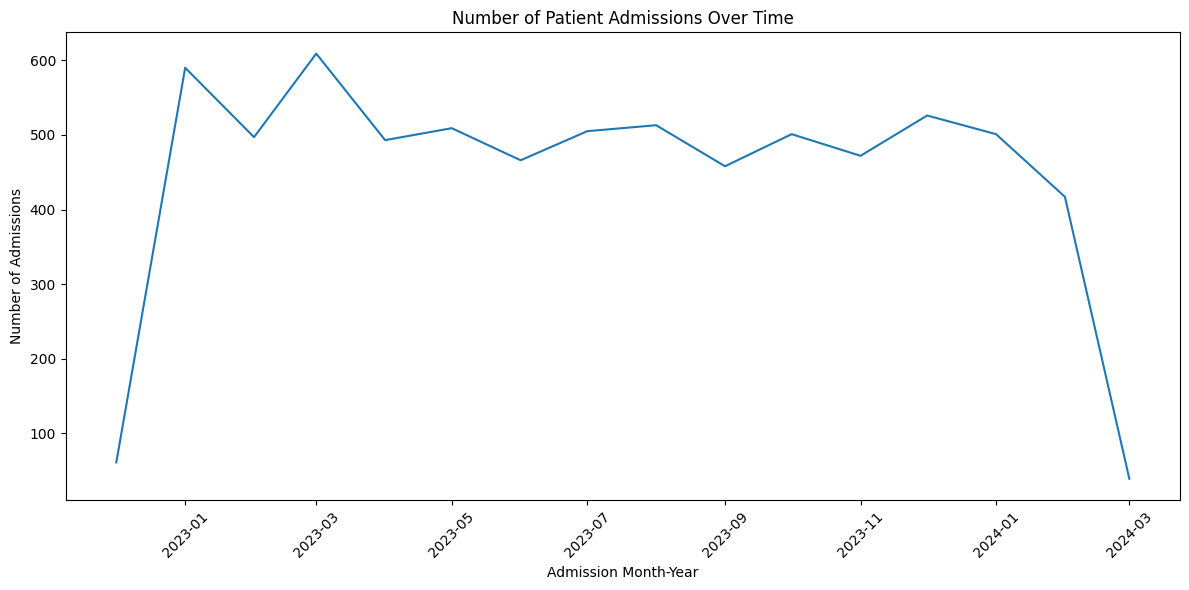

In [24]:
# Convert 'Admit_MY' to datetime objects for better plotting
df_patient_admit['Admit_MY'] = pd.to_datetime(df_patient_admit['Admit_MY'], format='%Y-%m')

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='Admit_MY', y='total_patients', data=df_patient_admit)
plt.xlabel("Admission Month-Year")
plt.ylabel("Number of Admissions")
plt.title("Number of Patient Admissions Over Time")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [27]:
#####Query 2#####

query = '''SELECT Diagnosis, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Diagnosis
          ORDER BY total_patients DESC
          LIMIT 5'''

df_diagnosis = pd.read_sql_query(query, conn)
df_diagnosis

,Diagnosis,total_patients
0,Viral Infection,2004
1,Flu,1717
2,Malaria,1431
3,Typhoid,1145
4,Pneumonia,573


In [28]:
####Query 3####

query = '''SELECT Bed_Occupancy, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Bed_Occupancy
          ORDER BY total_patients DESC
          '''

df_bed_occ = pd.read_sql_query(query, conn)
df_bed_occ

,Bed_Occupancy,total_patients
0,Private,3579
1,General,2385
2,ICU,1193


In [31]:
####Query 4#####


query = '''SELECT strftime('%m',AdmitDate) as Admit_month, COUNT(*) as total_patients
          FROM all_data
          GROUP BY strftime('%m',AdmitDate)
        '''

df_patient_admit_month = pd.read_sql_query(query, conn)
df_patient_admit_month

,Admit_month,total_patients
0,01,1091
1,02,914
2,03,648
3,04,493
4,05,509
5,06,466
6,07,505
7,08,513
8,09,458
9,10,501


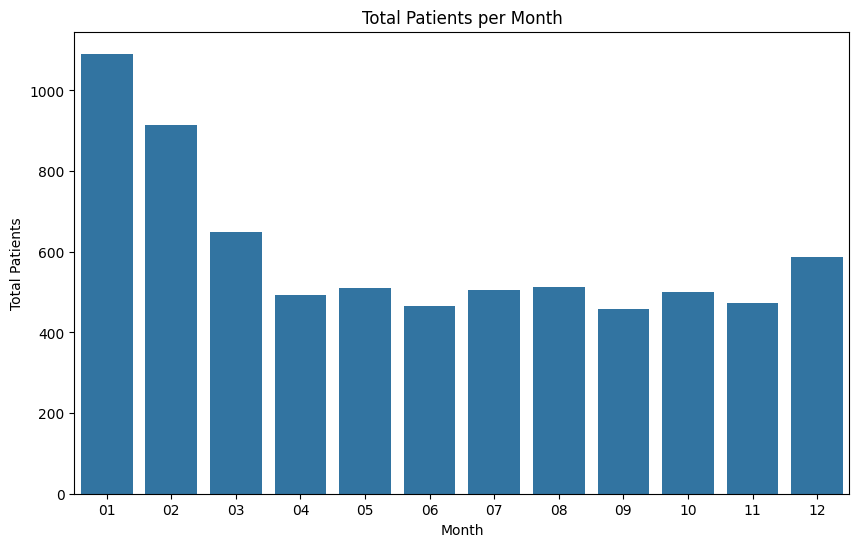

In [32]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Admit_month', y='total_patients', data=df_patient_admit_month)
plt.xlabel('Month')
plt.ylabel('Total Patients')
plt.title('Total Patients per Month')
plt.show()


In [45]:
####Query 5####

query = '''SELECT AVG(JULIANDAY(DischargeDate)-JULIANDAY(AdmitDate)) as avg_length_of_stay,
                  MAX(JULIANDAY(DischargeDate)-JULIANDAY(AdmitDate)) as max_length_of_stay
           FROM all_data
        '''

df_length_of_stay = pd.read_sql_query(query, conn)
df_length_of_stay

,avg_length_of_stay,max_length_of_stay
0,8.249825,45.0


In [49]:
####Query 6####

query = '''SELECT Doctor, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Doctor
          ORDER BY total_patients DESC
          LIMIT 10'''

df_doctor = pd.read_sql_query(query, conn)
df_doctor

,Doctor,total_patients
0,Mark Joy,1023
1,Jaya Yaadav,1023
2,Jay Sinha,1023
3,Tejas Saxena,1022
4,Ravi D,1022
5,Niki Sharma,1022
6,Naresh Goyenka,1022


In [51]:
####Query 7####

query = '''SELECT Test, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Test
          ORDER BY total_patients DESC
          LIMIT 10'''

df_test = pd.read_sql_query(query, conn)
df_test

,Test,total_patients
0,Blood Test,2236
1,MRI,1789
2,CT Scan,1342
3,X-Ray,895
4,Ultrasound,895


In [52]:
####Query 8####

query = '''SELECT Feedback, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Feedback
          ORDER BY total_patients DESC
          '''

df_feedback = pd.read_sql_query(query, conn)
df_feedback

,Feedback,total_patients
0,5.0,4079
1,4.9,1256
2,4.0,628
3,3.5,628
4,4.5,566


In [56]:
####Query 9####

query = '''SELECT AVG(Billing_Amount) as avg_billing_amount,
                  MAX(Billing_Amount) as max_billing_amount,
                  MIN(Billing_Amount) as min_billing_amount
          FROM all_data
          '''

df_billing_amount = pd.read_sql_query(query, conn)
df_billing_amount

,avg_billing_amount,max_billing_amount,min_billing_amount
0,26607.891854,95867.0,1223.0


In [57]:
####Query 10####

query = '''SELECT AVG(Health_Insurance_Amount) as avg_health_insurance_amount,
                  MAX(Health_Insurance_Amount) as max_health_insurance_amount,
                  MIN(Health_Insurance_Amount) as min_health_insurance_amount
          FROM all_data
          '''

df_health_insurance_amount = pd.read_sql_query(query, conn)
df_health_insurance_amount

,avg_health_insurance_amount,max_health_insurance_amount,min_health_insurance_amount
0,23947.102669,86280.3,1100.7


In [61]:
####Query 11####

query = '''SELECT COUNT(*) as total_patients_followup
          FROM non_na_data
          '''

df_followup = pd.read_sql_query(query, conn)
df_followup

,total_patients_followup
0,7035


In [62]:
####Query 12####

query = '''SELECT COUNT(*) as total_patients_no_followup
          FROM followup_na_data
          '''

df_no_followup = pd.read_sql_query(query, conn)
df_no_followup

,total_patients_no_followup
0,122


In [66]:
####Query 13####

query = '''SELECT AVG(JULIANDAY(FollowupDate)-JULIANDAY(DischargeDate)) as avg_length_discharge_until_followup,
                  MAX(JULIANDAY(FollowupDate)-JULIANDAY(DischargeDate)) as max_length_discharge_until_followup,
                  AVG(JULIANDAY(FollowupDate)-JULIANDAY(AdmitDate)) as avg_length_admit_until_followup,
                  MAX(JULIANDAY(FollowupDate)-JULIANDAY(AdmitDate)) as max_length_admit_until_followup
           FROM non_na_data
        '''

df_length_until_followup = pd.read_sql_query(query, conn)
df_length_until_followup

,avg_length_discharge_until_followup,max_length_discharge_until_followup,avg_length_admit_until_followup,max_length_admit_until_followup
0,11.242502,40.0,19.494812,84.0


In [68]:
####Query 14####

query = '''SELECT Bed_Occupancy, Diagnosis, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Bed_Occupancy, Diagnosis
          ORDER BY total_patients DESC
          '''

df_bed_diagnosis = pd.read_sql_query(query, conn)
df_bed_diagnosis

,Bed_Occupancy,Diagnosis,total_patients
0,Private,Viral Infection,1003
1,Private,Flu,859
2,Private,Malaria,715
3,General,Viral Infection,667
4,General,Flu,572
5,Private,Typhoid,571
6,General,Malaria,478
7,General,Typhoid,382
8,ICU,Viral Infection,334
9,Private,Pneumonia,287


In [73]:
####Query 15####

query = '''SELECT Doctor, Diagnosis, COUNT(*) as total_patients
          FROM all_data
          GROUP BY Doctor, Diagnosis
          ORDER BY total_patients DESC
          '''

df_doctor_diagnosis = pd.read_sql_query(query, conn)
df_doctor_diagnosis

,Doctor,Diagnosis,total_patients
0,Jaya Yaadav,Viral Infection,287
1,Mark Joy,Viral Infection,287
2,Jay Sinha,Viral Infection,286
3,Naresh Goyenka,Viral Infection,286
4,Niki Sharma,Viral Infection,286
5,Ravi D,Viral Infection,286
6,Tejas Saxena,Viral Infection,286
7,Jay Sinha,Flu,246
8,Ravi D,Flu,246
9,Jaya Yaadav,Flu,245


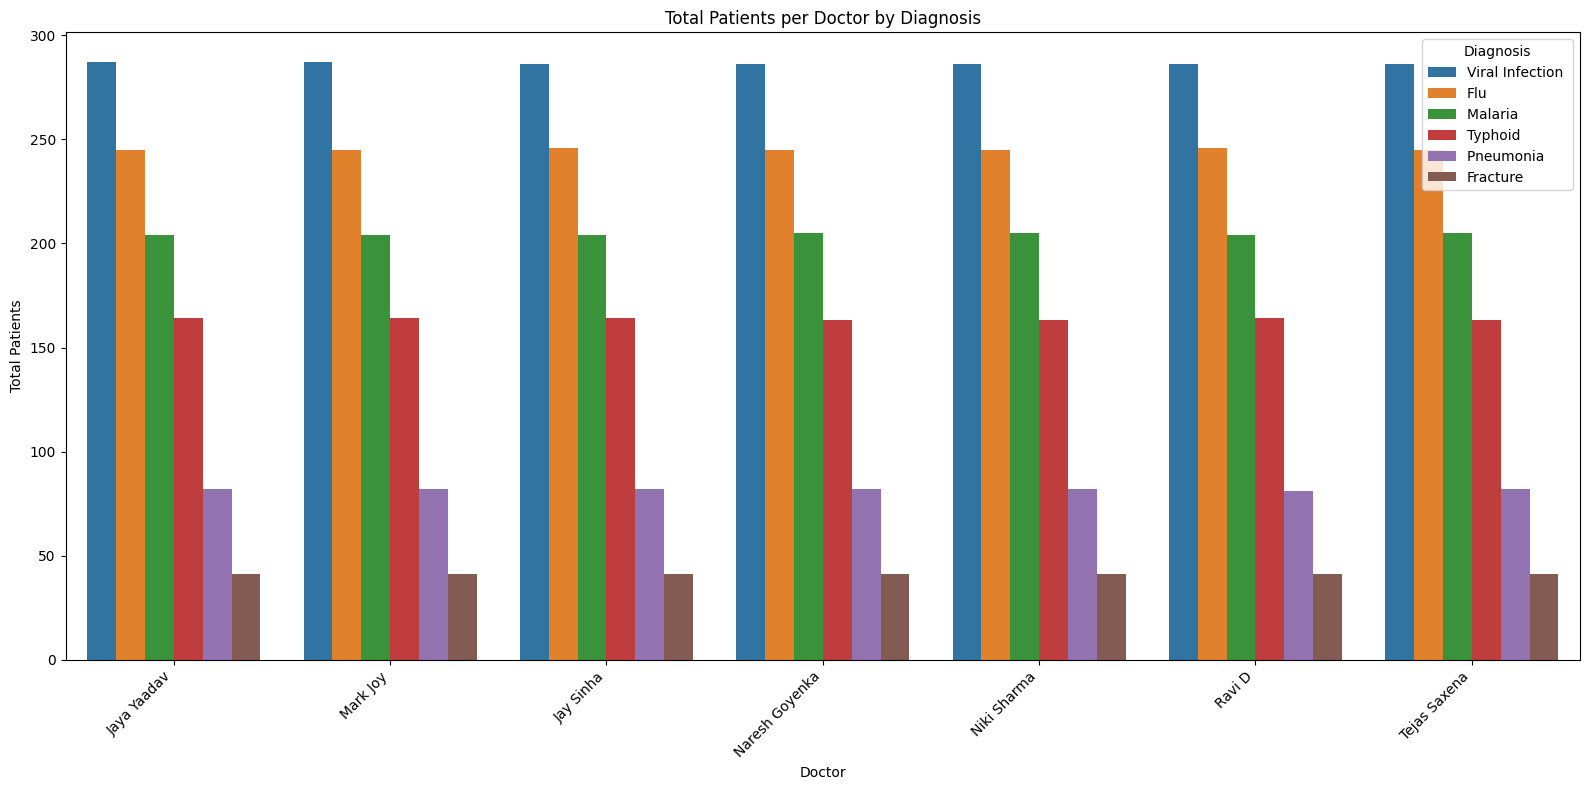

In [75]:


plt.figure(figsize=(16, 8))
sns.barplot(x='Doctor', y='total_patients', hue='Diagnosis', data=df_doctor_diagnosis)
plt.xlabel('Doctor')
plt.ylabel('Total Patients')
plt.title('Total Patients per Doctor by Diagnosis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [81]:
conn.close()

In [79]:
!pip3 install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [2]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [1]:
# prompt: create a streamlit app with the above code

%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Assuming your database is already created and populated as in the provided code

conn = sqlite3.connect('Healthcare_data.db')
cursor = conn.cursor()


st.title("Healthcare Data Analysis App")

# Sidebar with query options
selected_query = st.sidebar.selectbox(
    "Select a query to display:",
    [
        "Number of Patient Admissions Over Time",
        "Top 5 Diagnoses",
        "Bed Occupancy Distribution",
        "Patient Admissions per Month",
        "Length of Stay Statistics",
        "Top 10 Doctors",
        "Top 10 Tests",
        "Feedback Distribution",
        "Billing Amount Statistics",
        "Health Insurance Amount Statistics",
        "Patients with Followup",
        "Patients without Followup",
        "Time until Followup",
        "Bed Occupancy and Diagnosis",
        "Doctor and Diagnosis",
    ],
)

# Display data based on selected query
if selected_query == "Number of Patient Admissions Over Time":
  query = '''SELECT strftime('%Y-%m',AdmitDate) as Admit_MY, COUNT(*) as total_patients
            FROM all_data
            GROUP BY strftime('%Y-%m',AdmitDate)'''
  df_patient_admit = pd.read_sql_query(query, conn)
  df_patient_admit['Admit_MY'] = pd.to_datetime(df_patient_admit['Admit_MY'], format='%Y-%m')
  st.subheader("Patient Admissions Over Time")
  fig, ax = plt.subplots(figsize=(12, 6))
  sns.lineplot(x='Admit_MY', y='total_patients', data=df_patient_admit, ax=ax)
  st.pyplot(fig)


elif selected_query == "Top 5 Diagnoses":
  query = '''SELECT Diagnosis, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Diagnosis
            ORDER BY total_patients DESC
            LIMIT 5'''
  df_diagnosis = pd.read_sql_query(query, conn)
  st.subheader("Top 5 Diagnoses")
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(x='Diagnosis', y='total_patients', data=df_diagnosis, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

elif selected_query == "Bed Occupancy Distribution":
  query = '''SELECT Bed_Occupancy, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Bed_Occupancy
            ORDER BY total_patients DESC'''
  df_bed_occ = pd.read_sql_query(query, conn)
  st.subheader("Bed Occupancy Distribution")
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(x='Bed_Occupancy', y='total_patients', data=df_bed_occ, ax=ax)
  st.pyplot(fig)

elif selected_query == "Patient Admissions per Month":
  query = '''SELECT strftime('%m',AdmitDate) as Admit_month, COUNT(*) as total_patients
            FROM all_data
            GROUP BY strftime('%m',AdmitDate)'''
  df_patient_admit_month = pd.read_sql_query(query, conn)
  st.subheader("Patient Admissions per Month")
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x='Admit_month', y='total_patients', data=df_patient_admit_month, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

elif selected_query == "Length of Stay Statistics":
  query = '''SELECT AVG(JULIANDAY(DischargeDate)-JULIANDAY(AdmitDate)) as avg_length_of_stay,
                    MAX(JULIANDAY(DischargeDate)-JULIANDAY(AdmitDate)) as max_length_of_stay
            FROM all_data'''
  df_length_of_stay = pd.read_sql_query(query, conn)
  st.subheader("Length of Stay Statistics")
  st.write(df_length_of_stay)

elif selected_query == "Top 10 Doctors":
  query = '''SELECT Doctor, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Doctor
            ORDER BY total_patients DESC
            LIMIT 10'''
  df_doctor = pd.read_sql_query(query, conn)
  st.subheader("Top 10 Doctors")
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x='Doctor', y='total_patients', data=df_doctor, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

elif selected_query == "Top 10 Tests":
  query = '''SELECT Test, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Test
            ORDER BY total_patients DESC
            LIMIT 10'''
  df_test = pd.read_sql_query(query, conn)
  st.subheader("Top 10 Tests")
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x='Test', y='total_patients', data=df_test, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

elif selected_query == "Feedback Distribution":
  query = '''SELECT Feedback, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Feedback
            ORDER BY total_patients DESC'''
  df_feedback = pd.read_sql_query(query, conn)
  st.subheader("Feedback Distribution")
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(x='Feedback', y='total_patients', data=df_feedback, ax=ax)
  st.pyplot(fig)

elif selected_query == "Billing Amount Statistics":
  query = '''SELECT AVG(Billing_Amount) as avg_billing_amount,
                    MAX(Billing_Amount) as max_billing_amount,
                    MIN(Billing_Amount) as min_billing_amount
            FROM all_data'''
  df_billing_amount = pd.read_sql_query(query, conn)
  st.subheader("Billing Amount Statistics")
  st.write(df_billing_amount)

elif selected_query == "Health Insurance Amount Statistics":
  query = '''SELECT AVG(Health_Insurance_Amount) as avg_health_insurance_amount,
                    MAX(Health_Insurance_Amount) as max_health_insurance_amount,
                    MIN(Health_Insurance_Amount) as min_health_insurance_amount
            FROM all_data'''
  df_health_insurance_amount = pd.read_sql_query(query, conn)
  st.subheader("Health Insurance Amount Statistics")
  st.write(df_health_insurance_amount)

elif selected_query == "Patients with Followup":
  query = '''SELECT COUNT(*) as total_patients_followup
            FROM non_na_data'''
  df_followup = pd.read_sql_query(query, conn)
  st.subheader("Patients with Followup")
  st.write(df_followup)

elif selected_query == "Patients without Followup":
  query = '''SELECT COUNT(*) as total_patients_no_followup
            FROM followup_na_data'''
  df_no_followup = pd.read_sql_query(query, conn)
  st.subheader("Patients without Followup")
  st.write(df_no_followup)

elif selected_query == "Time until Followup":
  query = '''SELECT AVG(JULIANDAY(FollowupDate)-JULIANDAY(DischargeDate)) as avg_length_discharge_until_followup,
                    MAX(JULIANDAY(FollowupDate)-JULIANDAY(DischargeDate)) as max_length
                    AVG(JULIANDAY(FollowupDate)-JULIANDAY(AdmitDate)) as avg_length_admit_until_followup,
                    MAX(JULIANDAY(FollowupDate)-JULIANDAY(AdmitDate)) as max_length
            FROM non_na_data'''
  df_length_until_followup = pd.read_sql_query(query, conn)
  st.subheader("Time until Followup")
  st.write(df_length_until_followup)

elif selected_query == "Bed Occupancy and Diagnosis":
  query = '''SELECT Bed_Occupancy, Diagnosis, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Bed_Occupancy, Diagnosis
            ORDER BY total_patients DESC'''
  df_bed_diagnosis = pd.read_sql_query(query, conn)
  st.subheader("Bed Occupancy and Diagnosis")
  fig, ax = plt.subplots(figsize=(16, 8))
  sns.barplot(x='Bed_Occupancy', y='total_patients', hue='Diagnosis', data=df_bed_diagnosis, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

elif selected_query == "Doctor and Diagnosis":
  query = '''SELECT Doctor, Diagnosis, COUNT(*) as total_patients
            FROM all_data
            GROUP BY Doctor, Diagnosis
            ORDER BY total_patients DESC'''
  df_doctor_diagnosis = pd.read_sql_query(query, conn)
  st.subheader("Patient Distribution per Doctor and Diagnosis")
  fig, ax = plt.subplots(figsize=(16,8))
  sns.barplot(x='Doctor', y='total_patients', hue='Diagnosis', data=df_doctor_diagnosis, ax=ax)
  plt.xticks(rotation=45, ha='right')
  st.pyplot(fig)

conn.close()


Writing app.py


In [6]:
!streamlit run app.py &>/content/drive/MyDrive/Colab Notebooks/GUVI Project 2/log.txt&



In [8]:
# #!pip install pyngrok
# from pyngrok import ngrok

# # Terminate open tunnels if any exist
# ngrok.kill()

# # Setting the authtoken (optional)
# # Get your authtoken from https://dashboard.ngrok.com/auth
# NGROK_AUTH_TOKEN = "2sYdnMtwh7JC89GIpMeZtRehest_5DWV423Rvrqg2d7QNn8Bi"  # Replace with your actual authtoken
# ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# # Open an HTTPs tunnel on port 8501
# # Add the bind_tls option to force https
# public_url = ngrok.connect(8501, bind_tls=True)
# print("Streamlit app is running at:", public_url)

# !streamlit run app.py &>/content/drive/MyDrive/Colab Notebooks/GUVI Project 2/log.txt&


Streamlit app is running at: NgrokTunnel: "https://e4b8-35-204-153-50.ngrok-free.app" -> "http://localhost:8501"
